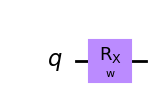

In [60]:
#The following QC learns a single parameter. There is no data encoding. We start with a random parameter(W) and go towrads
# the optimal value(2*Pi)
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit ,Aer,execute
from qiskit.visualization import plot_state_city
import numpy as np
#Hypperparameters
global W
W=np.array([np.pi/2])
#Quantum Circuit
param= Parameter("w")
qc= QuantumCircuit(1)
qc.rx(param,0)
display(qc.draw('mpl'))
#Utilities
def cir(qc,theta):
    qcnew=qc.assign_parameters(theta)
    simulator= Aer.get_backend('statevector_simulator')
    result= execute(qcnew,simulator).result()
    return result.get_statevector()
def der(sv):
    return (np.imag(sv[1])+np.real(sv[1]))/2 # sv1 because der of sv0 gives sv1.
def train(qc,lr):
    global W
    sv=cir(qc,W)
    W=W-lr*der(sv)


In [61]:
#Hypperparameters
global W
W=np.array([np.pi/2])
for i in range(100):
    train(qc,1)
    if(i%10==0):
        print(f"The W:{W}")
        print(f"Corresponding output:{cir(qc,W).data}")
print(f"final output:{cir(qc,W)}")


The W:[1.92434972]
Corresponding output:[0.57173701+0.j         0.        -0.82043695j]
The W:[5.73819994]
Corresponding output:[-0.96310303+0.j          0.        -0.26913298j]
The W:[6.25220456]
Corresponding output:[-0.99988003+0.j          0.        -0.01548975j]
The W:[6.28144062]
Corresponding output:[-0.99999962+0.j          0.        -0.00087234j]
The W:[6.28308706]
Corresponding output:[-1.+0.00000000e+00j  0.-4.91247567e-05j]
The W:[6.28317977]
Corresponding output:[-1.+0.00000000e+00j  0.-2.76638771e-06j]
The W:[6.283185]
Corresponding output:[-1.+0.00000000e+00j  0.-1.55785015e-07j]
The W:[6.28318529]
Corresponding output:[-1.+0.00000000e+00j  0.-8.77280172e-09j]
The W:[6.28318531]
Corresponding output:[-1.+0.00000000e+00j  0.-4.94027164e-10j]
The W:[6.28318531]
Corresponding output:[-1.+0.0000000e+00j  0.-2.7820091e-11j]
final output:Statevector([-1.+0.00000000e+00j,  0.-2.08867402e-12j],
            dims=(2,))


In [62]:
#the output is lowest value plausible -1. If you want to go to [0,0], you have to square the loss function (cos(theta/2))^2
def der(sv):
  return abs(np.imag(sv[0]))+np.real(sv[0])*(np.imag(sv[1]))+np.real(sv[1])# cos(theta/2)*sin(theta/2)
#Hypperparameters
global W
W=np.array([np.random.rand()])
#training
for i in range(100):
    train(qc,1)
    if(i%10==0):
        print(f"The W:{W}")
        print(f"Corresponding output:{cir(qc,W).data}")
print(f"final output:{cir(qc,W)}")

The W:[1.34150293]
Corresponding output:[0.78335479+0.j         0.        -0.62157483j]
The W:[3.13781909]
Corresponding output:[0.00188678+0.j         0.        -0.99999822j]
The W:[3.14158897]
Corresponding output:[1.84256605e-06+0.j 0.00000000e+00-1.j]
The W:[3.14159265]
Corresponding output:[1.79938093e-09+0.j 0.00000000e+00-1.j]
The W:[3.14159265]
Corresponding output:[1.75710019e-12+0.j 0.00000000e+00-1.j]
The W:[3.14159265]
Corresponding output:[1.61554457e-15+0.j 0.00000000e+00-1.j]
The W:[3.14159265]
Corresponding output:[6.123234e-17+0.j 0.000000e+00-1.j]
The W:[3.14159265]
Corresponding output:[6.123234e-17+0.j 0.000000e+00-1.j]
The W:[3.14159265]
Corresponding output:[6.123234e-17+0.j 0.000000e+00-1.j]
The W:[3.14159265]
Corresponding output:[6.123234e-17+0.j 0.000000e+00-1.j]
final output:Statevector([6.123234e-17+0.j, 0.000000e+00-1.j],
            dims=(2,))
